Sampling Distribution: Distribution of sample statistic under given sample size, population parameter, population variability.
- True purpose: its variability (MSE) observes random sampling variablity of the statistic from the true population parameter. 

Boostrapped Sampling Distribution: Estimates the True Sampling Distribution using our raw sample data, 
- True Purpose: Characterizes the **estimated** uncertainty of our sample statistic as an estimate of parameter.
- Reason: its variablity (MSE) estimates the true variablity of the statistic *(from our sample statistic as an estimate of parmeter)* using our sample data *(for its size and variability(STD))*
- Characterization: 95%CI - middle 95% of the boostrapped statistic which we consider the **estimiated** plausible range of the true parameter.

Therefore less variability (MSE) in boostrapped sampling distribution leads to lower uncertainty/higher confidence in our sample statistic as an estimation of the paramter (intuitively), and narrower inference range (95%CI) for the parameter (mathematically). 
- Which means we are "more" informed about what the paramter is. the two views are same in nature

In [1]:
from scipy import stats
pdf=stats.multinomial(n=1000, p=[0.05, 0.85, 0.05, 0.05])
#n : number of trials per experiment (a paramter)
pdf.rvs(size=5)
#size : number of experiments per sample (analogy"sample size")

array([[ 49, 856,  52,  43],
       [ 43, 856,  48,  53],
       [ 51, 846,  50,  53],
       [ 50, 841,  53,  56],
       [ 45, 853,  47,  55]])

In [2]:
import numpy as np
import pandas as pd
draws=np.random.choice([0,1,2,3], size=1000, p=[0.05, 0.85, 0.05, 0.05]) 
#raw outcomes of 1000 trials in one experiment
pd.Series(draws).value_counts().sort_index()

0     47
1    844
2     61
3     48
Name: count, dtype: int64

r<sub>$x_i$,$Y_i$</sub> = Cor($x_i$,$Y_i$) strength of the "linear association", described by:

**Theoretical Model**

$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma^2\right)$

$Y_i$(Outcome): Numeric Random Variable, Continous, Normally Distributed.
 - The Sum of a Deterministic Variable and a Random Variable:

$\beta_0 + \beta_1 x_i$: The Deterministic Variable, A Linear Equation where:
 - $\beta_0$(Intercept): The expected (average) value of $Y_i$ vairbale when $x_i$ is 0
 - $\beta_1$(Slope): The change in the expected value of $Y_i$ for every one unit increase in $x_i$

$\epsilon_i$(Error Term): A Continous Random Variable with a mean of 0 and a standard deviation of $\sigma$


$\begin{aligned}
Y_i &\sim \mathcal{N}(\beta_0 + \beta_1 x_i, \sigma^2)
\end{aligned}$
If Using this form, then:

$Y_i$(Outcome): Numeric Random Variable, Continous, Normally Distributed.

$\sim \mathcal{N}(\beta_0 + \beta_1 x_i, \sigma^2)$: The (nromal) Distribution of this Random variable.
 - $\beta_0 + \beta_1 x_i$: The Mean
 - $\sigma$: The Standard Deviation

In [3]:
#Simulation
import pandas as pd ; from scipy import stats; import numpy as np
n=3000; beta0=1; beta1=2; sigma=100; epsilon=stats.norm(loc=0, scale=sigma).rvs(size=n)
Predictor = stats.uniform(0, 10).rvs(n) #Random n of x values from 0 to 10
Predictor=np.sort(Predictor)
Outcome = beta0 + beta1*Predictor + epsilon
df = pd.DataFrame({'x_i':Predictor, 'Y_i':Outcome})

**The Fitted Model:**
 $\hat{y}_i = \hat\beta_0 + \hat\beta_1 x_i$
 
is **an estimate** of the theoretical model, where:

$\hat{y}_i$(Fitted Value): An estimate (or "the fitted model's predictions") of the the expected **average** value of $Y_i$. 

$\hat\beta_0$: An estimate of $\beta_0$

$\hat\beta_1$: An estimate of $\beta_1$



In [4]:
#Simulation:
import statsmodels.formula.api as smf
ols_object=smf.ols("Y_i ~ x_i",data=df)
fitted_model=ols_object.fit()
print(fitted_model.summary().tables[1])
print(smf.ols("Y_i ~ x_i",data=df).fit().pvalues[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9286      3.631      0.531      0.595      -5.191       9.048
x_i            2.1624      0.627      3.449      0.001       0.933       3.392
0.0005706655621860822


/tmp/ipykernel_115/3327068297.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(smf.ols("Y_i ~ x_i",data=df).fit().pvalues[1])


**Observing the p-value in .summary or .summary().tables[1] we can tell if there is significant association!**

**Comparing Unpaired Samples**

Method 1: Simple Linear Regression with Indicator Variable
     $Y_i = \beta_0 + \beta_1 \times 1[\text{group}(k_i)] + \epsilon_i$

$1[\text{group}(k_i)]$ :A Binary Categorcial variable with values 0 and 1 only, each representing one of the two groups. It's different from canonical SLR where $x_i$ is a continous numerical variable.

$\beta_1$: The difference in the Expected (Mean) value of the Outcome between the two groups, different from SLR where it represent "rise over run" association

Relationship with $N\left(0, \sigma^2\right)$: When using Simple Indicator Regression To Compare two groups as well as the significance and inference of the difference, we need our data to hold up to the linear assumptions first: Which is :
 - $\epsilon_i \sim \mathcal N\left(0, \sigma^2\right)$ (Error Term Normally Distributed, Variance remains constant, and Mean is 0). Otherwise, inisghts about the population drawn from the model are not valid.


In [5]:
#Simulation
df['group'] = np.random.choice([0, 1], size=df.shape[0])
IndicatorModel=smf.ols("Y_i ~ group",data=df).fit()
IndicatorModel.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,13.8185,2.597,5.320,0.000,8.726,18.911
group,-2.0703,3.645,-0.568,0.570,-9.218,5.077


In [6]:
#Method 2: Double Boostrapping
n_bootstraps =1000
Bootstrapped_Mean_Differences = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    bootstrapped_samples = \
        df.groupby("group")[["Y_i", "group"]].sample(frac=1, replace=True)
    #.groupby("group") ensures boostrapping happens independently within groups, not single global booststrap
    Bootstrapped_Mean_Differences[i] = \
        bootstrapped_samples.groupby("group")["Y_i"].mean().diff().values[1]

print(np.quantile(Bootstrapped_Mean_Differences, [0.025, 0.975]))
#Boostrapped Sampling Distribution of the so-called "Mean Difference" Sample Statistic.

[-9.35839541  5.23095586]


Method 3: Permuatation Test

$ H_0:\text{There is no difference between the two populations.}$ (Hence, no real distinction between groups and exchanging group labels does not make a difference.)

**Mean Difference Under the Null Hypothesis is 0.**

**Samples Under the Null Hypothesis**: Same outcome values, every possible permutation of randomly shuffled group labels. 

**Sampling Distribution of Mean difference Under The Null Hypothesis** observed by obtaining the mean difference of every simulated sample.

**p-value** of observed difference is the proportion of mean differences further away from zero then the observed difference.

In [8]:
#Simulation
print(df.groupby('group')['Y_i'].mean())
print(df.groupby('group')['Y_i'].mean().diff().values)

simulated_mean_differences = np.zeros(n_bootstraps)
# Permutation test
for i in range(n_bootstraps):
    df['shuffled_group'] = df['group'].sample(
        frac=1, replace=False).values
    simulated_mean_differences[i] = \
        df.groupby('shuffled_group')['Y_i'].mean().diff().values[1]
p_value=(abs(simulated_mean_differences)>=abs(df.groupby('group')['Y_i'].mean().diff().values[1])).sum()/n_bootstraps
p_value

group
0    13.818488
1    11.748213
Name: Y_i, dtype: float64
[        nan -2.07027557]


0.576

**Predictive-Performance based Model Building**

In [9]:
from sklearn import model_selection
train,test=model_selection.train_test_split(df, train_size=0.5)
model=smf.ols("Y_i ~ x_i",data=train).fit()
print("'In sample' R-squared:",model.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(test.Y_i,model.predict(test.x_i))[0,1]**2)


'In sample' R-squared: 0.002799535488752225
'Out of sample' R-squared: 0.005250370649642702


Regression: Predict Numerical Outcomes. eg:SLR, MLR,  Regression Decision Trees

Classificiation: Predict categorcial Outcomes. eg: LR, Classification Decision Tree, Multi-class Classification Decision Tree

$\Large\text{Logistic regression}$ 
- fits a linear model to the predictor variable and the log-odds of the outcome variable (given by the link funtion of **logit**), making the coeficients uninterpretable for this course. 
- However, when .predict(), the log-odds are transformed into a probability using another funtion called **inverse-logit**, 
- serving the goal of this model: predicting probability of the bianry outcome for a given predictor value.

In [10]:
#simulation
logit_object=smf.logit("group ~ x_i",data=df)
LR_Model=logit_object.fit()
print(LR_Model.summary().tables[1])
LR_Model.predict(df.x_i)


Optimization terminated successfully.
         Current function value: 0.693029
         Iterations 3
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0342      0.073      0.469      0.639      -0.109       0.177
x_i           -0.0007      0.013     -0.056      0.955      -0.025       0.024


0       0.508550
1       0.508549
2       0.508549
3       0.508548
4       0.508547
          ...   
2995    0.506790
2996    0.506790
2997    0.506790
2998    0.506789
2999    0.506789
Length: 3000, dtype: float64

**Confusion Matrices and Metrics are used to assess classification models rather than R^2, and "significance" is already waaaay out of the window.**

## Decision Tree Fitting: Many many interactions

**Machine Learning In a Nutshell**: Controlling model complexity through regularization tuning parameters to balance between underfitting and overfitting under the train-test framework, in order to optimize out-of-sample predictive performance generalizability.

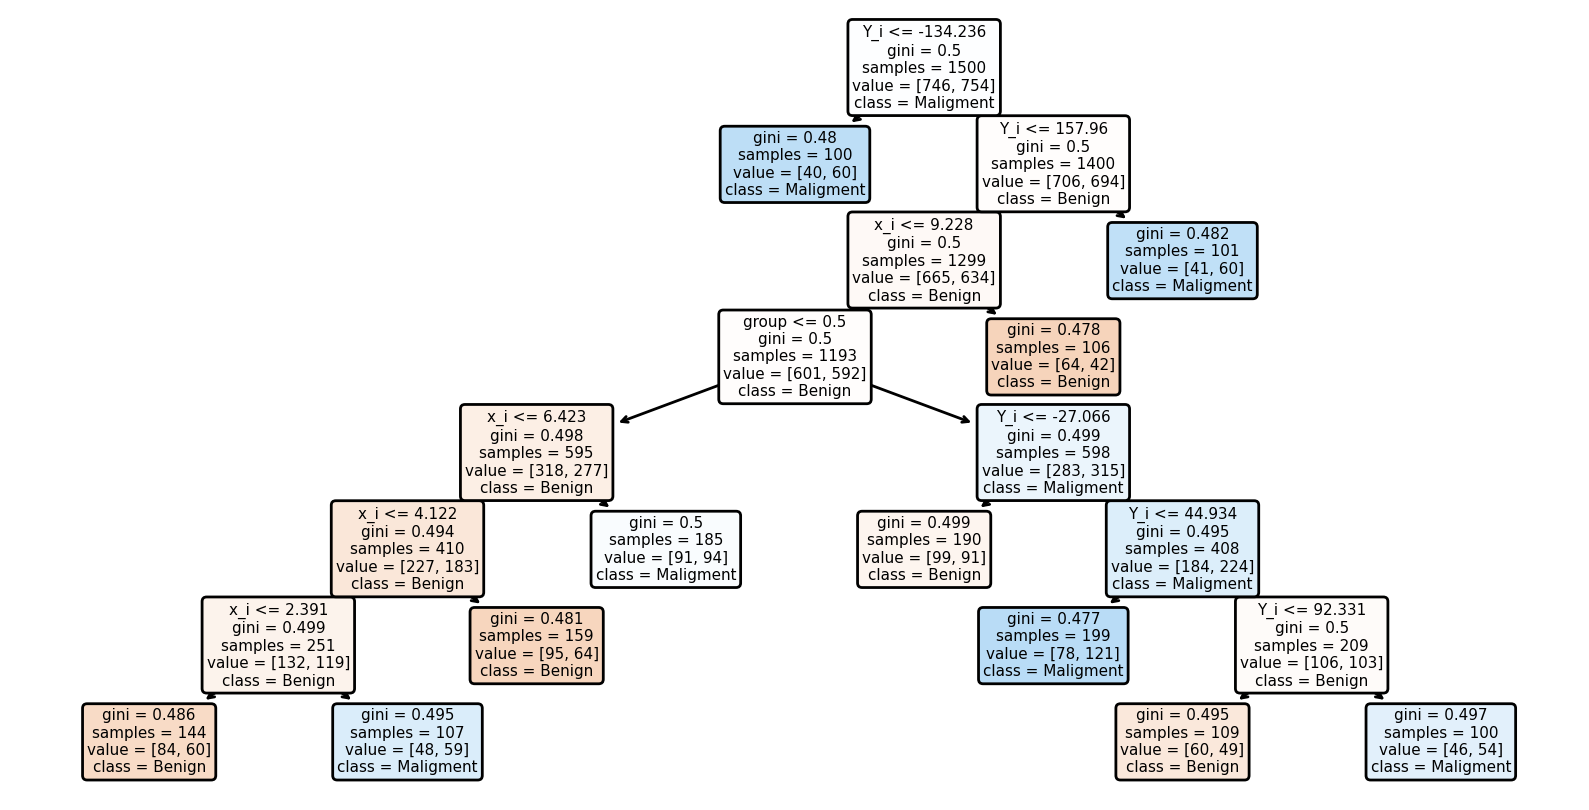

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(max_depth=15, random_state=42, 
                             min_samples_leaf=100, 
                             min_samples_split=10)
#These are regularization parameters.
clf.fit(X=train.drop(columns=['group']), y=train.group)
plt.figure(figsize=(10,5), dpi=200)
plot_tree(clf, feature_names=train.columns.tolist(), 
          class_names=['Benign','Maligment'],
          filled=True, rounded=True)
plt.show()
# class_names=['Benign','Maligment'] are assigned to labels in numerical ascending order

In [12]:
from sklearn.metrics import confusion_matrix
train_predict=clf.predict(train.drop(columns=['group']))
cm_Train=confusion_matrix(train.group, train_predict,labels=[0, 1])
test_predict=clf.predict(test.drop(columns=['group']))
cm_Test=confusion_matrix(test.group,test_predict,labels=[False, True])
#[False, True]==[0, 1]
#(train.group==1).all()==train.group.all()==((train.group)==1).astype(int).all()
#Boolean and Binary Interchangable

cm[0]: True Class == labels[0]
  - cm[0][0]: Predicted Class == labels[0] -> True Positive (TP)
  - cm[0][1]: Predicted Class == labels[1] -> False Positive (FP)

cm[1]: True Class == labels[1]
  - cm[1][0]: Predicted Class == labels[0] -> False Negative (FN)
  - cm[1][1]: Predicted Class == labels[1] -> True Negative (TN)
  
**When Unspecified, labels are detected for the two series and ordered alphabetically for text values or numerically in ascending order eg. [0,1] or [Benign,Malignant]**

In [13]:
th=0.9
predict_proba=clf.predict_proba(test.drop(columns=['group']))
print(predict_proba)
cm=(confusion_matrix((test.group), predict_proba[:, 1]>th))
cm

[[0.46       0.54      ]
 [0.58333333 0.41666667]
 [0.60377358 0.39622642]
 ...
 [0.44859813 0.55140187]
 [0.46       0.54      ]
 [0.58333333 0.41666667]]


array([[731,   0],
       [769,   0]])

**Probability Threshold**: Lowering the threshold==>More Probability Predictions will be classfied as positive. Less Predictions will be classified negative.
As a result,
- Sensitivity, the True Positive Rate (out of all actual positives), will INCREASE.
- 1-Sensitivy, the False Negative Rate (out of all actual positives),will DECREASE.
- Specificty, the True Negative Rate (out of all actual negatives), will DECREASE.
- 1-Specificty, The False Postive Rate (out of all actual negatives), will INCREASE.

The Trade-Off Balance between Sensitivity and 1-Specificty can be observed from the **ROC curve**.
